# Sobre o Projeto
## Análise de Dados sobre o mercado de jogos do PS4
### Extraído de VzCharts

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Dataset

In [2]:
Data_Set = pd.read_csv('PS4_GamesSales.csv', encoding='latin-1')
Data_Set.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


### Shape

In [3]:
Data_Set.shape

(1034, 9)

### Valores Nulos

In [4]:
Data_Set.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

In [5]:
Data_Set.dropna(inplace=True)

### Estatísticas

In [6]:
Data_Set.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


### Removendo os anos nulos

In [7]:
Sales = Data_Set.loc[(Data_Set['Year'] != 2019) & (Data_Set['Year'] != 2020) ]

### Vendas Globais

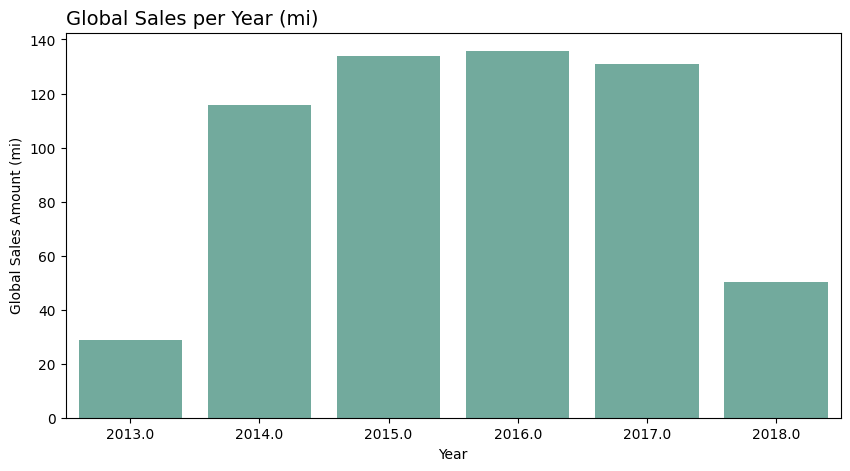

In [8]:
plt.figure(figsize=(10, 5))
plt.title('Global Sales per Year (mi)', loc='left', fontsize=14)
sns.barplot(data=Sales, x='Year', y='Global', ci=None, color='#69b3a2', estimator=sum)

plt.ylabel('Global Sales Amount (mi)');

### Distribuição de Vendas Globais

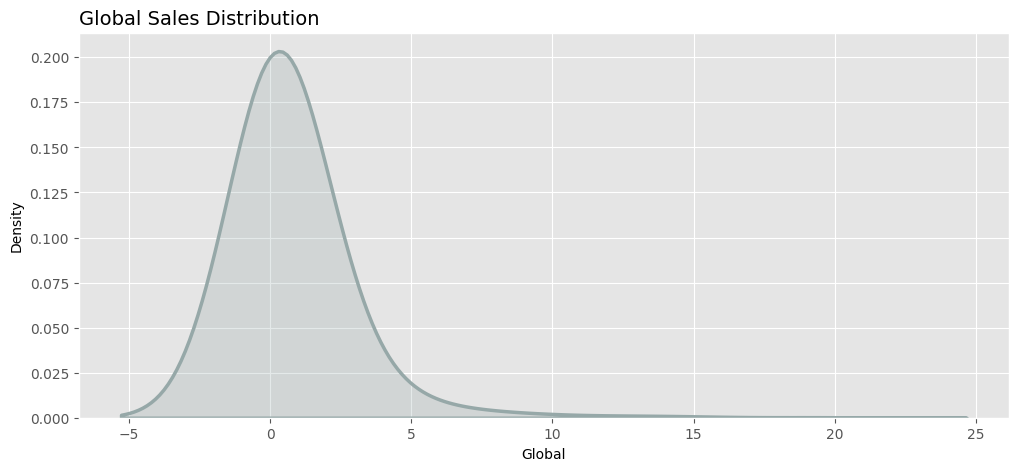

In [9]:
plt.figure(figsize=(12, 5))
plt.style.use('ggplot')

plt.title('Global Sales Distribution', loc='left', fontsize=14)

sns.kdeplot(Sales['Global'], shade=True, bw=1, color='#96a8a8', linewidth=2.5);

In [10]:
Sales.groupby(by=['Year']).sum()

,North America,Europe,Japan,Rest of World,Global
Year,,,,,
2013.0,10.35,12.88,0.97,4.57,28.76
2014.0,39.80,54.12,3.58,18.29,115.85
2015.0,49.60,56.21,7.28,20.88,133.99
2016.0,47.40,57.98,9.65,20.71,135.72
2017.0,44.77,57.18,9.08,19.89,130.90
2018.0,19.65,18.70,4.13,7.69,50.20


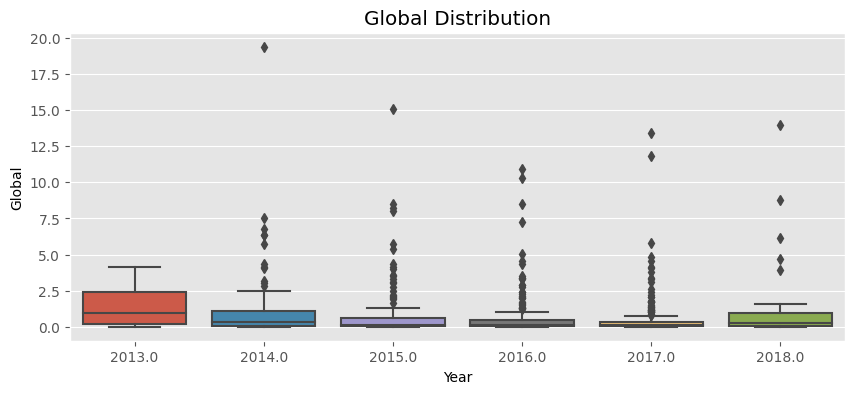

In [11]:
plt.figure(figsize=(10, 4))

plt.title('Global Distribution')

sns.boxplot(data=Sales, x='Year', y='Global');

In [12]:
Sales.loc[Sales['Global'] >= 10]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


### Analisando o percentual proporcional de cada continente comparado com o Total

In [13]:
Analysis = Sales.groupby(by=['Year']).sum().reset_index()
Analysis

,Year,North America,Europe,Japan,Rest of World,Global
0,2013.0,10.35,12.88,0.97,4.57,28.76
1,2014.0,39.80,54.12,3.58,18.29,115.85
2,2015.0,49.60,56.21,7.28,20.88,133.99
3,2016.0,47.40,57.98,9.65,20.71,135.72
4,2017.0,44.77,57.18,9.08,19.89,130.90
5,2018.0,19.65,18.70,4.13,7.69,50.20


### #Usando For

In [14]:
# America = []
# for america, total in zip(Analysis['North America'], Analysis['Global']):
#     a = america / total * 100
#     America.extend([a])

# Europe = []
# for europe, total in zip(Analysis['Europe'], Analysis['Global']):
#     a = europe / total * 100
#     Europe.extend([a])

# Japan = []
# for japan, total in zip(Analysis['Japan'], Analysis['Global']):
#     a = japan / total * 100
#     Japan.extend([a])

# R_World = []
# for world, total in zip(Analysis['Rest of World'], Analysis['Global']):
#     a = world / total * 100
#     R_World.extend([a])

### For simplificado

In [15]:
America = [america / total * 100 for america, total in zip(Analysis['North America'], Analysis['Global'])]
Europe = [europe / total * 100 for europe, total in zip(Analysis['Europe'], Analysis['Global'])]
Japan = [japan / total * 100 for japan, total in zip(Analysis['Japan'], Analysis['Global'])]
R_World = [rworld / total * 100 for rworld, total in zip(Analysis['Rest of World'], Analysis['Global'])]
America, Europe, Japan, R_World

([35.9874826147427,
  34.35476909797151,
  37.01768788715576,
  34.92484526967286,
  34.20168067226891,
  39.14342629482071],
 [44.78442280945759,
  46.71558049201555,
  41.95089185760131,
  42.72030651340996,
  43.68220015278838,
  37.25099601593625],
 [3.372739916550765,
  3.0902028485110056,
  5.433241286663184,
  7.110226937813145,
  6.936592818945759,
  8.227091633466136],
 [15.890125173852576,
  15.78765645230902,
  15.58325248152847,
  15.259357500736812,
  15.194805194805195,
  15.31872509960159])

### Gráfico de Barras Empilhado

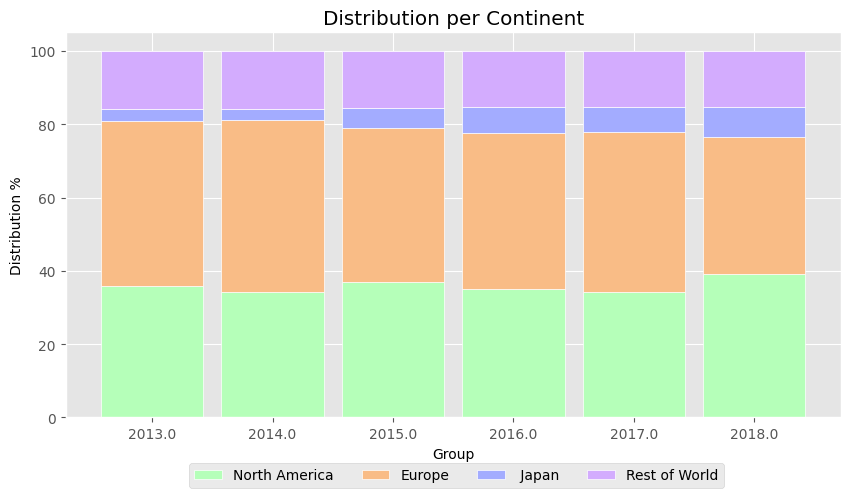

In [16]:
plt.figure( figsize=(10, 5) )


Bar_Width = 0.85
Labels = Analysis['Year']
Groups = [0, 1, 2, 3, 4, 5]

# titulo
plt.title('Distribution per Continent')

# America's Plot
plt.bar( Groups, America, width=Bar_Width, color='#b5ffb9', edgecolor='white' )

# Europe's Plot
plt.bar( Groups, Europe, bottom=America, width=Bar_Width, color='#f9bc86', edgecolor='white' )

# Japan's Plot
plt.bar( Groups, Japan, bottom=[ A + B for A, B in zip(America, Europe) ], width=Bar_Width, 
        color='#a3acff', edgecolor='white' )

# Rest of World's Plot
plt.bar( Groups, R_World, bottom=[ A + B + C for A, B, C in zip(America, Europe, Japan) ], 
        width=Bar_Width, color='#d3acfe', edgecolor='white' )

# Labels
plt.xticks( Groups, Labels )
plt.xlabel('Group')
plt.ylabel('Distribution %')

# Legend
plt.legend( ['North America', 'Europe',' Japan', 'Rest of World'], 
           loc='upper left', bbox_to_anchor=(0.15, -0.1), ncol=4 );

### Gerando Códigos para as Colunas (Publisher, Genre, Game)

In [17]:
Data_Set['Publisher'].unique()

array(['Rockstar Games', 'Activision', 'EA Sports', 'Electronic Arts',
       'Sony Interactive Entertainment', 'Bethesda Softworks',
       'Sony Computer Entertainment', 'Namco Bandai Games', 'Square Enix',
       'Capcom', 'Blizzard Entertainment', 'Ubisoft',
       'Warner Bros. Interactive', '2K Sports',
       'Warner Bros. Interactive Entertainment',
       'Konami Digital Entertainment', '2K Games', 'Hello Games',
       '505 Games', 'Deep Silver', 'Take-Two Interactive',
       'Bandai Namco Games', 'Sega', 'Tecmo Koei', 'Gearbox Software',
       'Mojang', 'Disney Interactive Studios', 'Focus Home Interactive',
       'Studio Wildcard', 'Codemasters', 'Koch Media',
       'Harmonix Music Systems', 'Rebellion Developments', 'Gun Media',
       'Telltale Games', 'Kalypso Media', 'City Interactive',
       'NIS America', 'Sold Out', 'Tripwire Interactive', 'PQube',
       'THQ Nordic', 'Milestone S.r.l.', 'Nordic Games', 'Astragon',
       'Koei Tecmo', 'Frontier Developments', 

In [18]:
from sklearn.preprocessing import LabelEncoder
Label_Funct = LabelEncoder()

Data_Set['Publ. Code'] = Label_Funct.fit_transform(Data_Set['Publisher'])
Data_Set['Gen. Code'] = Label_Funct.fit_transform(Data_Set['Genre'])
Data_Set['Game Code'] = Label_Funct.fit_transform(Data_Set['Game'])

Data_Set.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Publ. Code,Gen. Code,Game Code
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,109,0,283
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,103
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,109,1,534
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,107
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,41,14,229


In [19]:
Data_Set = Data_Set[['Game', 'Game Code', 'Genre', 'Gen. Code', 'Publisher', 'Publ. Code',
                  'North America', 'Europe', 'Japan', 'Rest of World', 'Global']]
Data_Set.head()

,Game,Game Code,Genre,Gen. Code,Publisher,Publ. Code,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,283,Action,0,Rockstar Games,109,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,103,Shooter,12,Activision,8,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,534,Action-Adventure,1,Rockstar Games,109,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,107,Shooter,12,Activision,8,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,229,Sports,14,EA Sports,41,1.27,8.64,0.15,1.73,11.80


In [20]:
Color_Palette = sns.color_palette('husl', 3)
Color_Palette

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744)]

### Análise das Publishers

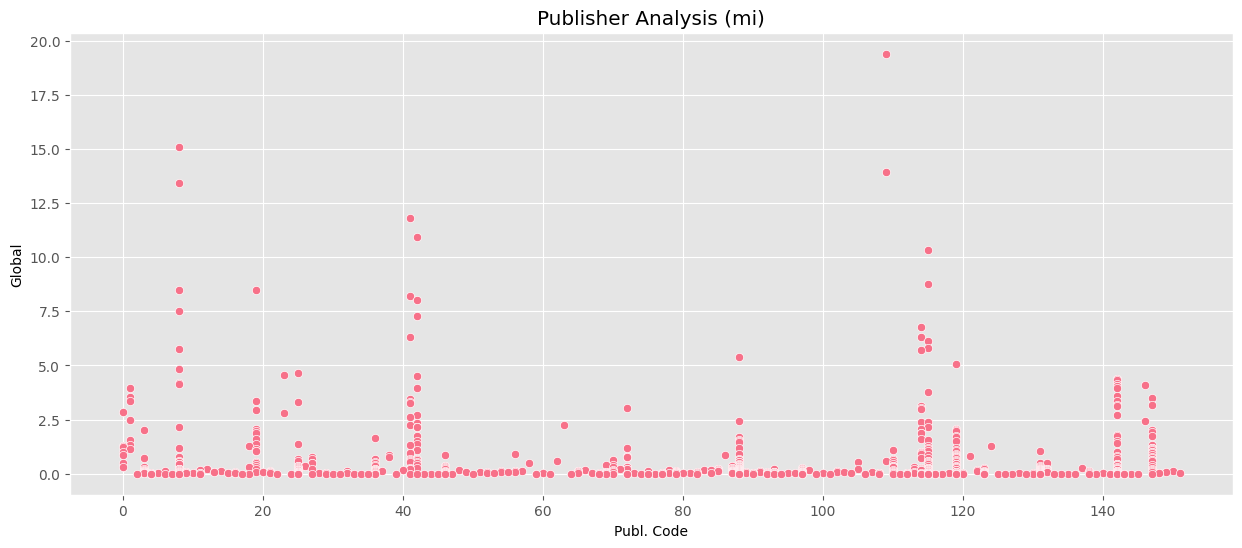

In [21]:
plt.figure(figsize=(15,6))
plt.title('Publisher Analysis (mi)')
sns.scatterplot(data=Data_Set, x='Publ. Code', y='Global', color=Color_Palette[0]);

### Análise dos Gêneros

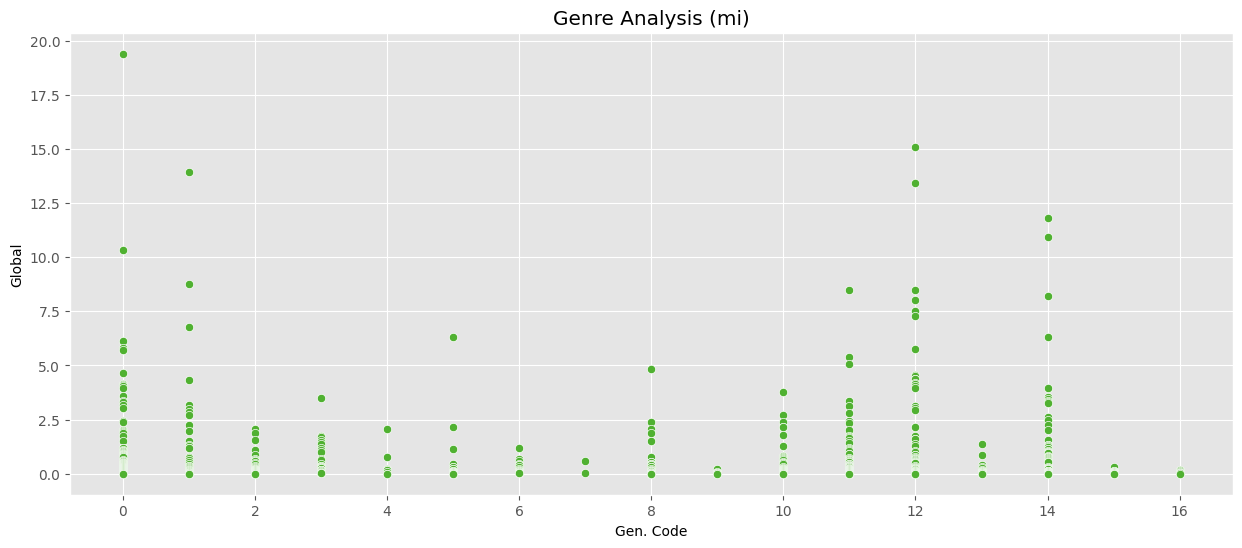

In [22]:
plt.figure(figsize=(15,6))
plt.title('Genre Analysis (mi)')
sns.scatterplot(data=Data_Set, x='Gen. Code', y='Global', color=Color_Palette[1]);

### Análise dos Jogos

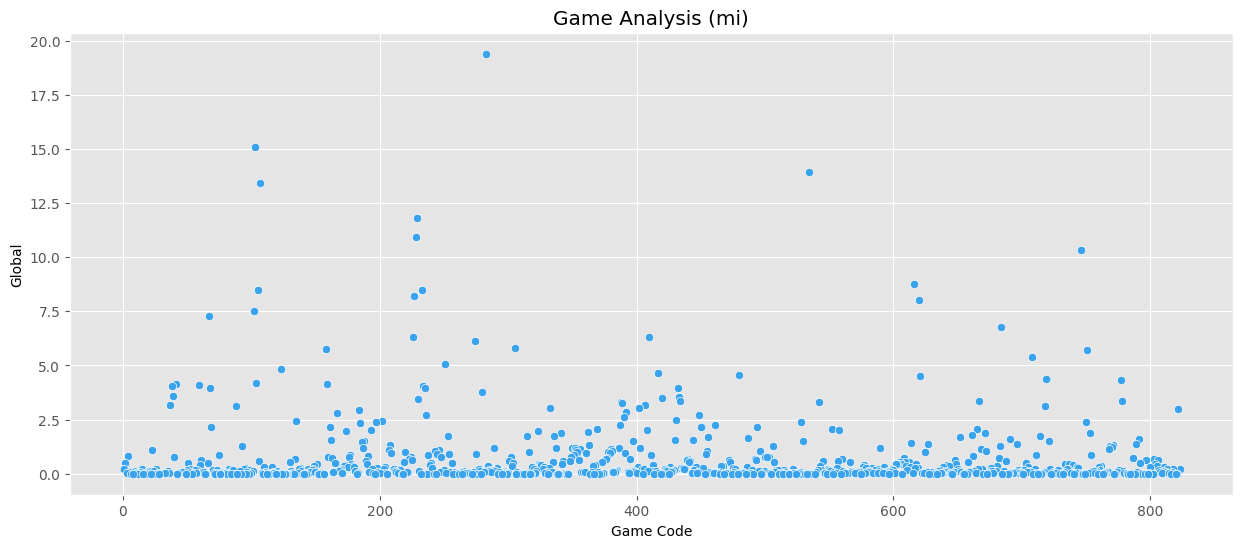

In [23]:
plt.figure(figsize=(15,6))
plt.title('Game Analysis (mi)')
sns.scatterplot(data=Data_Set, x='Game Code', y='Global', color=Color_Palette[2]);

### Relatório

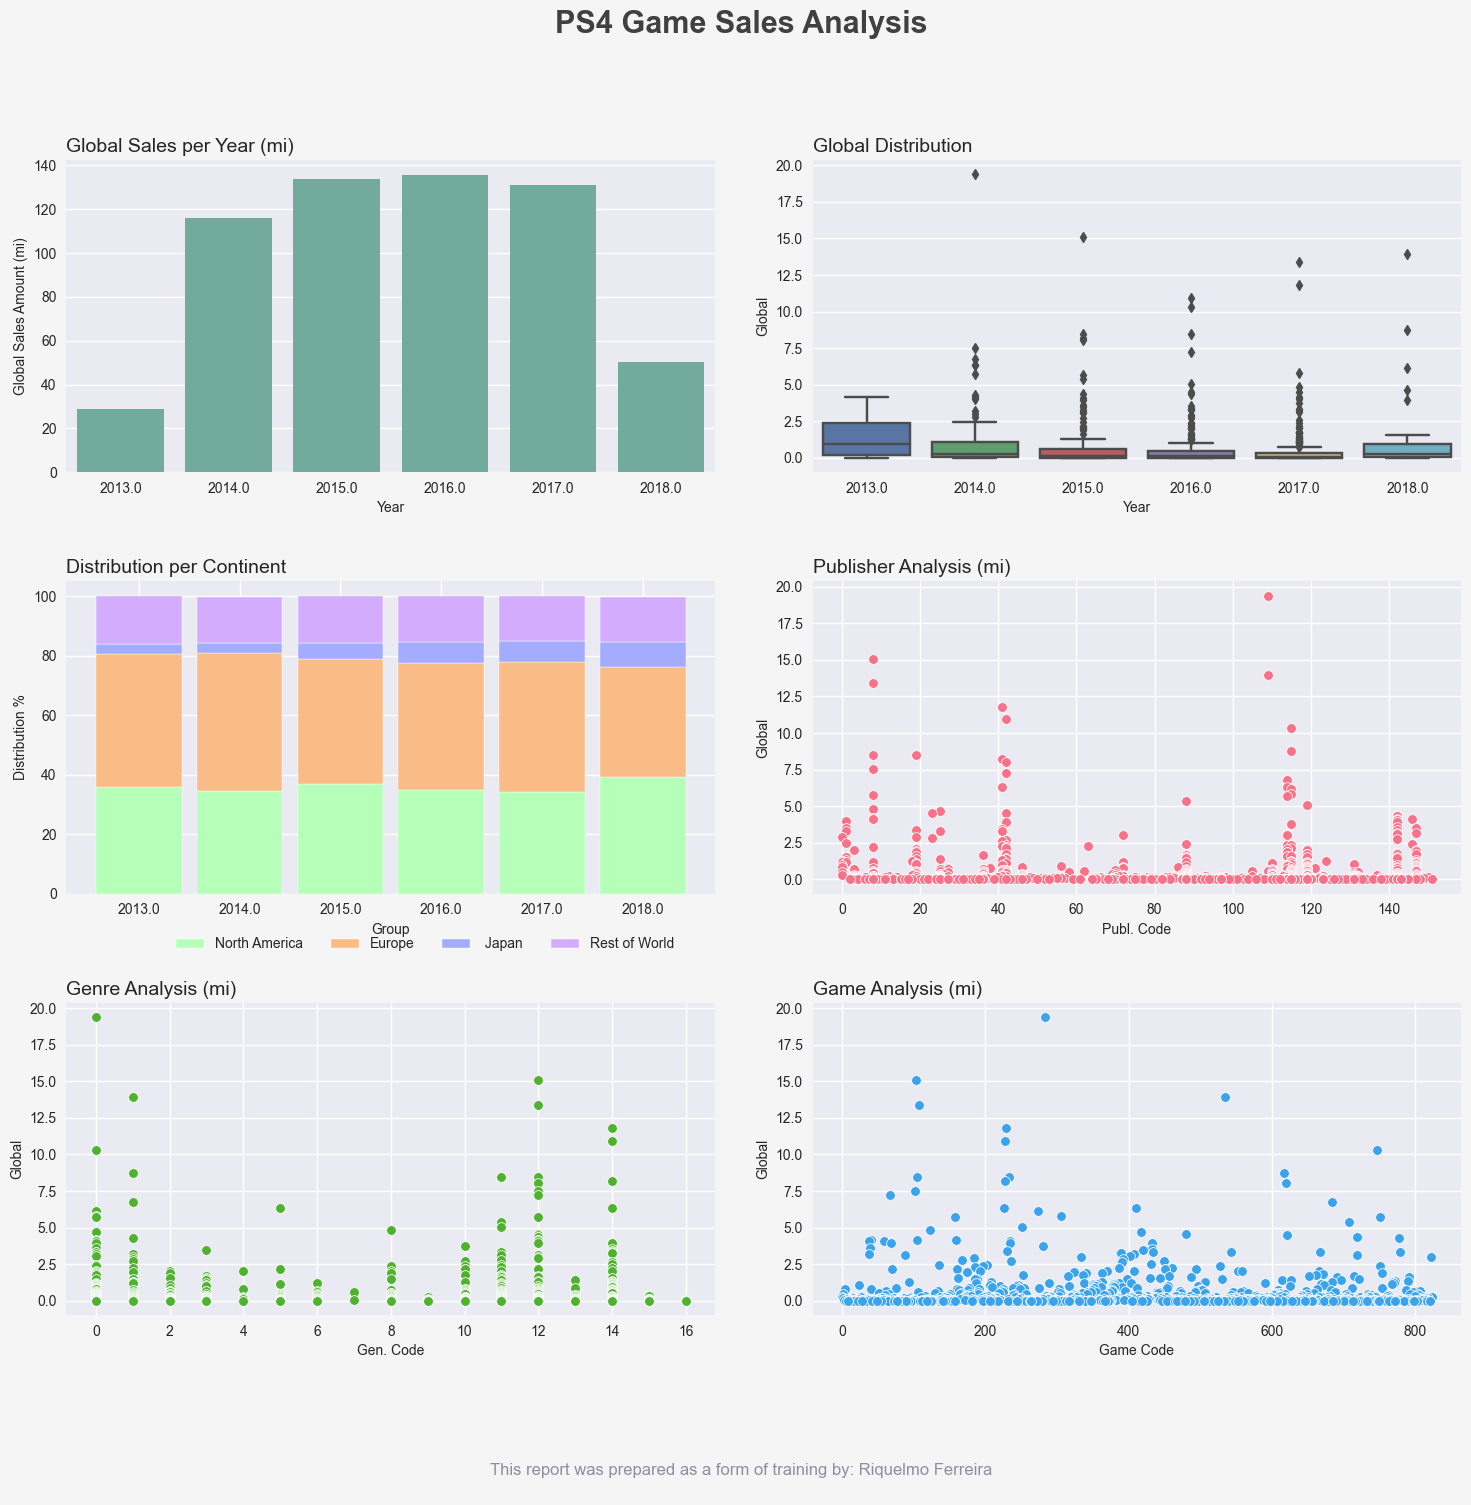

In [24]:
fig, ax = plt.subplots(figsize=(18, 15))

Background_Color = '#f5f5f5'
ax.set_facecolor(Background_Color)
fig.set_facecolor(Background_Color)

plt.style.use('seaborn')

plt.suptitle('PS4 Game Sales Analysis', fontsize=22, color='#404040', fontweight=600)

Rows = 3
Columns = 2

#Chart 1
plt.subplot(Rows, Columns, 1)
plt.title('Global Sales per Year (mi)', loc='left', fontsize=14)
sns.barplot(data=Sales, x='Year', y='Global', ci=None, color='#69b3a2', estimator=sum)
plt.ylabel('Global Sales Amount (mi)')

#Chart 2
plt.subplot(Rows, Columns, 2)
plt.title('Global Distribution', loc='left', fontsize=14)
sns.boxplot(data=Sales, x='Year', y='Global');

#Chart 3
plt.subplot(Rows, Columns, 3)
Bar_Width = 0.85
Labels = Analysis['Year']
Groups = [0, 1, 2, 3, 4, 5]

# Title
plt.title('Distribution per Continent', loc='left', fontsize=14)

# America's Plot
plt.bar( Groups, America, width=Bar_Width, color='#b5ffb9', edgecolor='white' )

# Europe's Plot
plt.bar( Groups, Europe, bottom=America, width=Bar_Width, color='#f9bc86', edgecolor='white' )

# Japan's Plot
plt.bar( Groups, Japan, bottom=[ A + B for A, B in zip(America, Europe) ], width=Bar_Width, 
        color='#a3acff', edgecolor='white' )

# Rest of World's Plot
plt.bar( Groups, R_World, bottom=[ A + B + C for A, B, C in zip(America, Europe, Japan) ], 
        width=Bar_Width, color='#d3acfe', edgecolor='white' )

# Labels
plt.xticks( Groups, Labels )
plt.xlabel('Group')
plt.ylabel('Distribution %')

# Legend
plt.legend( ['North America', 'Europe',' Japan', 'Rest of World'], 
           loc='upper left', bbox_to_anchor=(0.15, -0.1), ncol=4 );


#Chart 4
plt.subplot(Rows, Columns, 4)
plt.title('Publisher Analysis (mi)', loc='left', fontsize=14)
sns.scatterplot(data=Data_Set, x='Publ. Code', y='Global', color=Color_Palette[0]);

#Chart 5
plt.subplot(Rows, Columns, 5)
plt.title('Genre Analysis (mi)', loc='left', fontsize=14)
sns.scatterplot(data=Data_Set, x='Gen. Code', y='Global', color=Color_Palette[1]);

#Chart 6
plt.subplot(Rows, Columns, 6)
plt.title('Game Analysis (mi)', loc='left', fontsize=14)
sns.scatterplot(data=Data_Set, x='Game Code', y='Global', color=Color_Palette[2]);

plt.subplots_adjust(hspace=0.35, wspace=0.15)

footnote = '''
This report was prepared as a form of training by: Riquelmo Ferreira
'''

fig.text(0.5, -0.01, footnote, ha='center', va='bottom', size=12, color='#938ca1');